In [1]:
import sys
from pathlib import Path
import flowkit as fk
import pandas as pd

from fcs_anonymisation.loading import SampleManualCompensation

#sys.path.append("/home/jonalegr/flowcyt")
#from flowcyt.loading import CustomSample

datapath = Path("/home/jonalegr/Datasets") / "MockDataCHU"
metadata = pd.read_excel(datapath / 'metadata.xlsx')
fcs_path = datapath / "0001.fcs"
#fcs_path = "/home/jonalegr/FCS_CPaleari/preprocessed_trans-arcsinh_b-camilla_peacoqc-false/Patient1_LAM 10C Tube A_04-Oct-19.fcs"
xml_path = datapath / "000003.xml"

In [2]:
import seaborn as sns
sample = SampleManualCompensation(fcs_path, xml_path=xml_path)
compensation = sample.read_compensation(xml_path)

<Axes: >

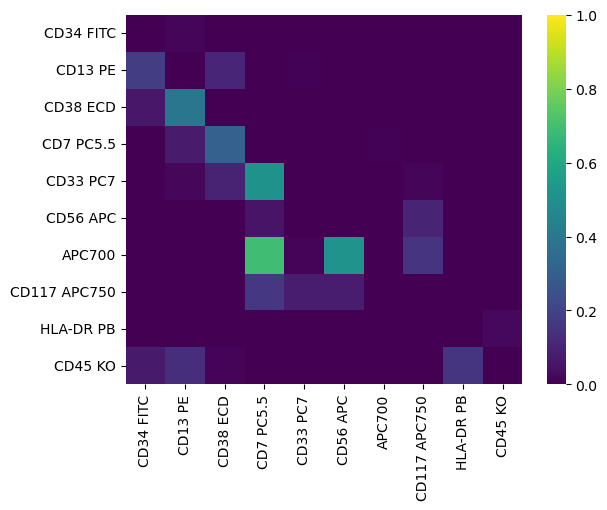

In [3]:
sns.heatmap(
    compensation.as_dataframe(fluoro_labels=True),
    vmin=0,
    vmax=1,
    cmap="viridis"
)

In [4]:
sample_df = sample.as_dataframe(source="raw", subsample=False, col_multi_index=True)

In [5]:
new_sample = fk.Sample(
    sample_df,
    sample_id="0001",
    compensation=sample.compensation
)

In [6]:
new_sample.as_dataframe(source="raw")

pnn,FS INT LIN,SS INT LIN,FL1 INT LOG,FL2 INT LOG,FL3 INT LOG,FL4 INT LOG,FL5 INT LOG,FL6 INT LOG,FL7 INT LOG,FL8 INT LOG,FL9 INT LOG,FL10 INT LOG,TIME
pns,FS INT LIN,SS INT LIN,CD34 FITC,CD13 PE,CD38 ECD,CD7 PC5.5,CD33 PC7,CD56 APC,APC700,CD117 APC750,HLA-DR PB,CD45 KO,TIME
0,30.200001,3.900000,1.512473,15.124725,5.674221,4.491007,25.254789,8.816831,4.655526,1.000000,2.689599,7.498942,0.0
1,53.200001,8.100000,5.232991,10.941138,22.067341,5.725488,19.809568,16.107615,1.000000,1.000000,3.367780,23.290966,0.0
2,49.000000,55.900002,1.998855,6.208243,2.436233,4.697589,22.067341,8.353625,8.429101,1.000000,8.659643,8.582104,0.0
3,30.600000,9.100000,5.327979,15.538399,11.341944,7.566695,35.866375,23.927992,13.335215,1.369994,4.293510,19.282185,0.0
4,118.199997,61.500000,8.976871,532.797913,385.422882,20.535250,1055.449585,22.266720,16.848549,1.000000,26.895988,176.235641,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177993,25.600000,3.900000,3.162278,5.777218,3.133962,10.090350,18.434231,4.782858,1.000000,2.206734,1.197085,10.941138,534.0
177994,29.400000,5.400000,3.586638,3.854229,8.896491,5.473703,6.097562,8.816831,9.057978,5.674221,2.813318,13.097472,534.0
177995,26.400000,10.100000,1.064986,8.278826,4.572527,8.505259,12.634629,13.215809,1.000000,1.000000,1.526138,8.976871,534.0


In [7]:
sample.get_metadata()

{'beginanalysis': '0',
 'begindata': '5958',
 'beginstext': '0',
 'btim': '14:33:26',
 'byteord': '4,3,2,1',
 'cells': ' ',
 'cyt': 'Navios',
 'datatype': 'F',
 'date': '10-Oct-19',
 'dfc10to1': '0.0',
 'dfc10to10': '0.0',
 'dfc10to2': '0.0',
 'dfc10to3': '0.0',
 'dfc10to4': '0.0',
 'dfc10to5': '0.0',
 'dfc10to6': '0.0',
 'dfc10to7': '0.0',
 'dfc10to8': '0.0',
 'dfc10to9': '2.2',
 'dfc1to1': '0.0',
 'dfc1to10': '6.9',
 'dfc1to2': '17.6',
 'dfc1to3': '6.2',
 'dfc1to4': '0.1',
 'dfc1to5': '0.0',
 'dfc1to6': '0.0',
 'dfc1to7': '0.0',
 'dfc1to8': '0.0',
 'dfc1to9': '0.1',
 'dfc2to1': '0.6',
 'dfc2to10': '13.1',
 'dfc2to2': '0.0',
 'dfc2to3': '39.1',
 'dfc2to4': '7.1',
 'dfc2to5': '1.7',
 'dfc2to6': '0.0',
 'dfc2to7': '0.0',
 'dfc2to8': '0.0',
 'dfc2to9': '0.0',
 'dfc3to1': '0.0',
 'dfc3to10': '0.8',
 'dfc3to2': '10.2',
 'dfc3to3': '0.0',
 'dfc3to4': '30.7',
 'dfc3to5': '9.6',
 'dfc3to6': '0.2',
 'dfc3to7': '0.2',
 'dfc3to8': '0.0',
 'dfc3to9': '0.0',
 'dfc4to1': '0.0',
 'dfc4to10': '0.1',


In [8]:
new_sample

Sample(v3.1, 0001, 13 channels, 177998 events)